# Customer Order Prediction Model

Before preparing our data, selecting a model, and training/testing, we need to import the necessary libraries/packages. 

### Import Necessary Libraries

In [60]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

## Process for Data Preparation, Model Selection, Training and Testing

Data Preparation:

1. load dataset using pandas library.
2. from EDA, we learned that there are no missing values in the dataset so we do not have to do any preprocessing in that regard. However, there are four categorical columns in the data (Year, Major, University, and Food Order) that we need to encode. We can do this using sklearn's LabelEncoder. For example, LabelEncoder will help us numerically represent the "University" column as values from 0 - 9. This encoding will be useful in ensuring our model will work. 
3. After encoding the categorical columns, we need to split the data into X (features) and y (target).
4. Finally, we need to split the data into the training and test sets.

Model Selection:

After preparing the data, we need to choose a model for prediction. I chose KNN. It makes no assumptions about the underlying data distribution. It can handle both categorical and numerical features. The choice of K in KNN allows for flexibility in controlling the model's sensitivity to local variations in the data thus balancing bias and variance. 

Training and Testing:

1. define a function that trains and pickles the model with an inputted k value. 
2. define a function that uses Cross-Validation accuracy to pick an optimal k value.
3. train the model using the previously defined function. Input the training data as well as the optimal k value attained from Cross-Validation 
4. Evaluate the performance of the model using classification report

## Data Preparation Function

In [42]:
def prepare_data(filename):
    
    # reads in the dataset
    df = pd.read_csv(filename)
    
    # encodes the categorical columns into numerical values
    label_encoders = {}
    category_mappings = {}
    categorical_features = ['Year', 'University', 'Major', 'Order']
    for feature in categorical_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

    # Creates a dictionary that explains what number each value in the categorical columns maps to 
        original_categories = le.classes_
        encoded_values = le.transform(original_categories)
        category_mapping = dict(zip(original_categories, encoded_values))
        category_mappings[feature] = category_mapping
    
    # splits the data into X (features) and Y (target)
    X = df[['Year', 'University', 'Major']]
    y = df['Order']
    
    # splits the X and Y into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, category_mappings

## Model Training & Pickle Function

In [43]:
def train_and_pickle_model(X_train, y_train, k_value, model_path): 
        
    # creates the model
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    
    # pickles the model
    with open(model_path, 'wb') as model_file:
        pickle.dump(knn, model_file)
        
    return knn 

### Best K Value Selection

In [44]:
def best_k_selection(X_train, y_train):
    
    k_values = list(range(1,21))
    cv_scores = []
    
    # calculates the cross-validation accuracy for models with varying choices of k
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
    
    # plots the cross-validation accuracy for each k value
    plt.plot(k_values, cv_scores)
    plt.xlabel('K')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title('Selecting the Best K Value')
    plt.show()
    
    # gets the k value with the highest cross-validation accuracy
    best_k = k_values[cv_scores.index(max(cv_scores))]
        
    return best_k

## Training and Testing of Model

In [45]:
dataset_path = "Xtern_TrainData.csv"
X_train, X_test, y_train, y_test, category_mappings = prepare_data(dataset_path)

In [32]:
category_mappings

{'Year': {'Year 1': 0, 'Year 2': 1, 'Year 3': 2, 'Year 4': 3},
 'University': {'Ball State University': 0,
  'Butler University': 1,
  'DePauw University': 2,
  'Indiana State University': 3,
  'Indiana University Bloomington': 4,
  'Indiana University-Purdue University Indianapolis (IUPUI)': 5,
  'Purdue University': 6,
  'University of Evansville': 7,
  'University of Notre Dame': 8,
  'Valparaiso University': 9},
 'Major': {'Accounting': 0,
  'Anthropology': 1,
  'Astronomy': 2,
  'Biology': 3,
  'Business Administration': 4,
  'Chemistry': 5,
  'Civil Engineering': 6,
  'Economics': 7,
  'Finance': 8,
  'Fine Arts': 9,
  'International Business': 10,
  'Marketing': 11,
  'Mathematics': 12,
  'Mechanical Engineering': 13,
  'Music': 14,
  'Philosophy': 15,
  'Physics': 16,
  'Political Science': 17,
  'Psychology': 18,
  'Sociology': 19},
 'Order': {'Breaded Pork Tenderloin Sandwich': 0,
  'Cornbread Hush Puppies': 1,
  'Fried Catfish Basket': 2,
  'Hoosier BBQ Pulled Pork Sandwich'

The above dictionary "category_mappings" is provided to give an understanding of how the different values in the categorical columns are encoded.  

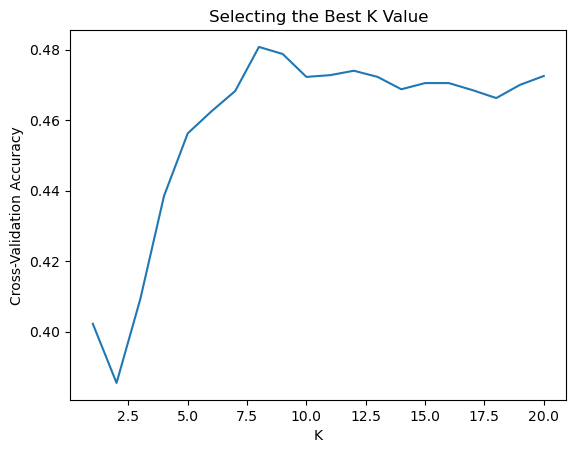

In [46]:
best_k = best_k_selection(X_train, y_train)

In [47]:
print("The best k value is", best_k)

The best k value is 8


In [48]:
model_path = 'knn_model.pk1'
trained_knn = train_and_pickle_model(X_train, y_train, best_k, model_path)

In [50]:
y_pred = trained_knn.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.39      0.39        94
           1       0.41      0.33      0.37       112
           2       0.60      0.41      0.49       107
           3       0.45      0.58      0.51       103
           4       0.53      0.25      0.34        93
           5       0.51      0.68      0.58        84
           6       0.47      0.77      0.58        95
           7       0.56      0.32      0.40       110
           8       0.45      0.41      0.43        98
           9       0.39      0.56      0.46       104

    accuracy                           0.46      1000
   macro avg       0.48      0.47      0.46      1000
weighted avg       0.48      0.46      0.45      1000

